# Learning goals

By the end of this tutorial, you will:

- Become familiar the planetary parameters that impact the shape of a lightcurve.
- Use the batman package to create a theoretical lightcurve model.
- Compare theoretical lightcurve models to observed data.

# Introduction

In this tutorial, we will create theoretical models of lightcurves for transiting exoplanets using the batman package. 

If you haven't installed batman yet, you can find out how to do so here: https://lkreidberg.github.io/batman/docs/html/index.html

# Tutorial

First, we import the relevant Python packages:

In [29]:
import numpy as np               #create and work with arrays
import matplotlib.pyplot as plt  #make plots
import batman                    #generate lightcurve models

We can check that batman is working correctly by running some tests:

In [6]:
batman.test()


Starting tests...

Testing uniform limb darkening model...	
	test passed
Testing linear limb darkening model...	
	test passed
Testing quadratic limb darkening model...	
	test passed
Testing exponential limb darkening model...	
	test passed
Testing logarithmic limb darkening model...	
	test passed
Testing nonlinear limb darkening model...	
	test passed

Testing error tolerance...
	10.0 ppm passed
	1.0 ppm passed
	0.1 ppm passed
	0.01 ppm passed

Testing multithreading...
	OpenMP not supported; test ignored

Congratulations! all tests passed

  ____       ____
  )   \     /   (
   )_  \_V_/  _(
     )__   __(
        `-'


/var/folders/81/lk37y3ms3c9fhd4187dp25hw0000gn/T/hasfunction-bikx1533/funcname.c:2:5: error: implicit declaration of function 'omp_get_num_threads' is invalid in C99 [-Werror,-Wimplicit-function-declaration]
    omp_get_num_threads();
    ^
1 error generated.
/var/folders/81/lk37y3ms3c9fhd4187dp25hw0000gn/T/hasfunction-x7ykqyd0/funcname.c:2:5: error: implicit declaration of function 'omp_get_num_threads' is invalid in C99 [-Werror,-Wimplicit-function-declaration]
    omp_get_num_threads();
    ^
1 error generated.


Depending on your computing setup you might see some warnings about OpenMP, but you can ignore these. Next, we define the planetary parameters for our model lightcurve.

In [7]:
params = batman.TransitParams()

params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

We can use np.linspace to create our time array:

In [8]:
t = np.linspace(-0.05, 0.05, 100)

Then we generate and plot the model:

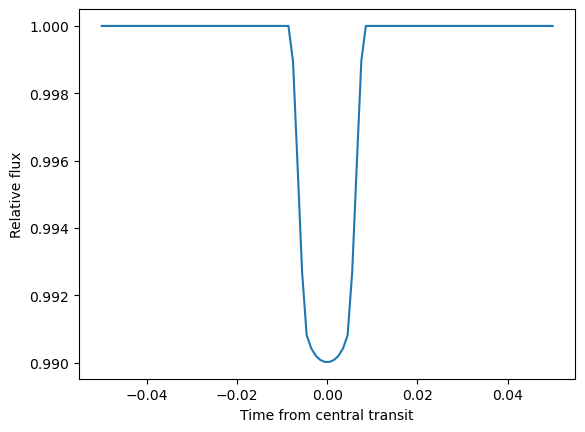

In [9]:
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

plt.plot(t, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()

Congratulations! You've just created a model lightcurve. Using what you've learned, here are three exercises for you to carry out:

# Exercises

 - 1. Create a figure showing how the above lightcurve changes as the planet-to-star radius ratio changes from 0.09 to 0.11.
 - 2. Compare a set of lightcurves with varying orbital semimajor axes from 5 to 20 stellar radii, keeping the other parameters the same as in the first example. Now repeat this, but change the orbital inclination from 87 degrees to 90 degrees. Why do the resulting lightcurves look different?
 - 3. Look up the parameters of the planet WASP-12b using the NASA Exoplanet Archive. Use those parameters to create a model lightcurve for the planet. Overplot this model on top of one transit from the lightcurve you downloaded in the previous notebook.
 
Write your code for exercise 1 here:

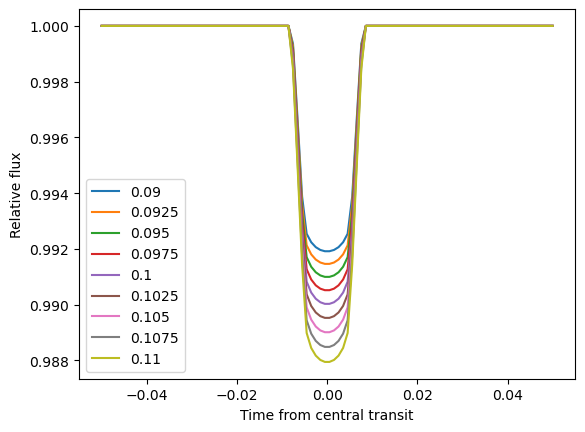

In [10]:
radii = np.linspace(0.09, 0.11, 9)
for r in radii:
        params.rp = r                           #updates planet radius
        new_flux = m.light_curve(params)        #recalculates light curve
        plt.plot(t,new_flux,label=str(r))
        
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.legend()
plt.show()

Now write your code for task 2 here. In this cell, start with the case where the inclination is 87 degrees...

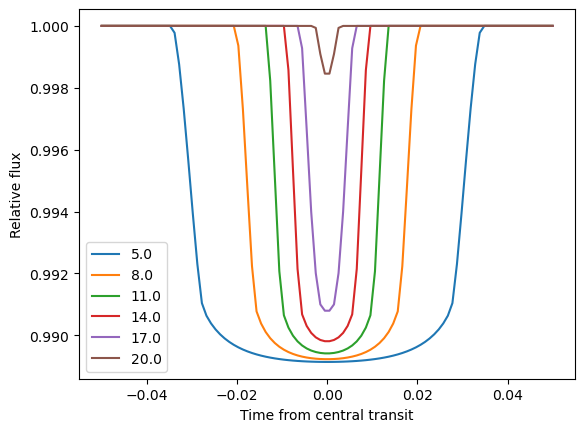

In [11]:
params.rp = 0.1
sm_axes = np.linspace(5,20,6)
for a in sm_axes:
        params.a = a                           #updates planet radius
        new_flux = m.light_curve(params)        #recalculates light curve
        plt.plot(t,new_flux,label=str(a))
        
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.legend()
plt.show()

...and now in this cell consider the case where the inclination is 90 degrees:

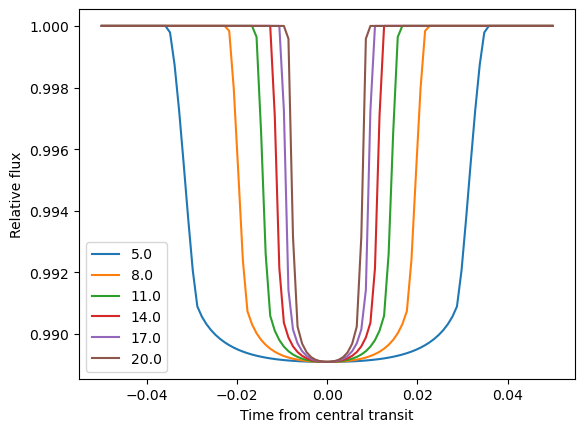

In [12]:
params.inc = 90.0

sm_axes = np.linspace(5,20,6)
for a in sm_axes:
        params.a = a                           #updates planet radius
        new_flux = m.light_curve(params)        #recalculates light curve
        plt.plot(t,new_flux,label=str(a))
        
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.legend()
plt.show()

Finally, write your code for task 3 here:

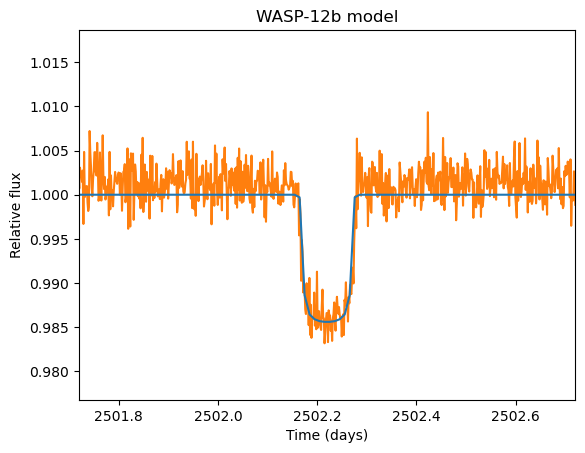

In [28]:
params_hd209 = batman.TransitParams() #Need to update these for WASP-12b!

params_hd209.t0 = 2502.22
params_hd209.per = 1.1
params_hd209.rp = 0.115#0.121
params_hd209.a = 3.5#8.81
params_hd209.inc = 88.0#86.71
params_hd209.ecc = 0.
params_hd209.w = 0.
params_hd209.u = [0.1, 0.3]
params_hd209.limb_dark = "quadratic"

t_new = np.linspace(params_hd209.t0-0.5,params_hd209.t0+0.5,100)

m = batman.TransitModel(params_hd209, t_new)
flux = m.light_curve(params_hd209)

plt.plot(t_new, flux)

flux_obs = np.loadtxt('lc_flux.txt')
flux_err = np.loadtxt('lc_flux_err.txt')
time_obs = np.loadtxt('lc_time.txt')

plt.plot(time_obs,flux_obs,zorder=0.1)

plt.xlim(params_hd209.t0-0.5,params_hd209.t0+0.5)

plt.title('WASP-12b model')
plt.xlabel("Time (days)")
plt.ylabel("Relative flux")
plt.show()